In [1]:
from keras.preprocessing.image import ImageDataGenerator
from data import *
from model import *
from image_function import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data_dir = 'Data\\sample3\\' # image folder

In [3]:
data_folder = data_dir #put your folder where you stored the annotated data
save_folder = data_dir+'aug' #put your folder where you want stored the augmentation data

In [4]:
data_gen_args = dict(rotation_range=1,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(10,data_folder,'image','mask',data_gen_args,save_to_dir = save_folder)

In [5]:
model = unet()
model_checkpoint = ModelCheckpoint('unet.h5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGenerator,steps_per_epoch=500,epochs=50,callbacks=[model_checkpoint], class_weight=[2.9, 0.1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\yizhe\Desktop\Yi\FP03.006Demo\model.py:67: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = outputs)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
Found 256 images belonging to 1 classes.
Found 256 images belonging to 1 classes.
500/500 [==============================] - 108s 216ms/step - loss: 0.0642 - acc: 0.9885

Epoch 00001: loss improved from inf to 0.06452, saving model to unet.h5
Epoch 2/50
500/500 [==============================] - 107s 214ms/step - loss: 0.0115 - acc: 0.9961

Epoch 00002: loss improved from 0.06452 to 0.01147, saving model to unet.h5
Epoch 3/50
500/500 [==============================] - 110s 219ms/step - loss: 0.0104 - acc: 0.9962

Epoch 00003: loss improved from 0.01147 to 0.01040, saving model to unet.h5
Epoch 4/50
500/500 [==============================] - 109s 217ms/step - loss: 0.0100 - acc: 0.9962

Epoch 00004: loss improved from 0.01040 to 0.00996, saving model to unet.h5
Epoch 5/50
500/500 [==============================] - 108s 217ms/step - loss: 0.0099 - acc: 0.9963

Epoch 00005: loss improved from 0.00996 to 0.00987, saving model to un

In [6]:
data, fs = load_images_from_folder(data_dir + 'Validate',  resize = True) # load validation data
data = np.expand_dims (data, axis = 3) # keras used channel last by default
np.shape(data)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(882, 256, 256, 1)

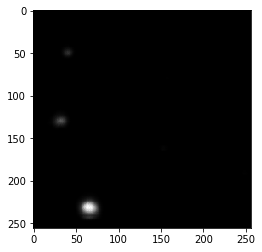

In [7]:
results = model.predict(data)
plt.imshow(results[230,:,:,0], cmap = 'gray')

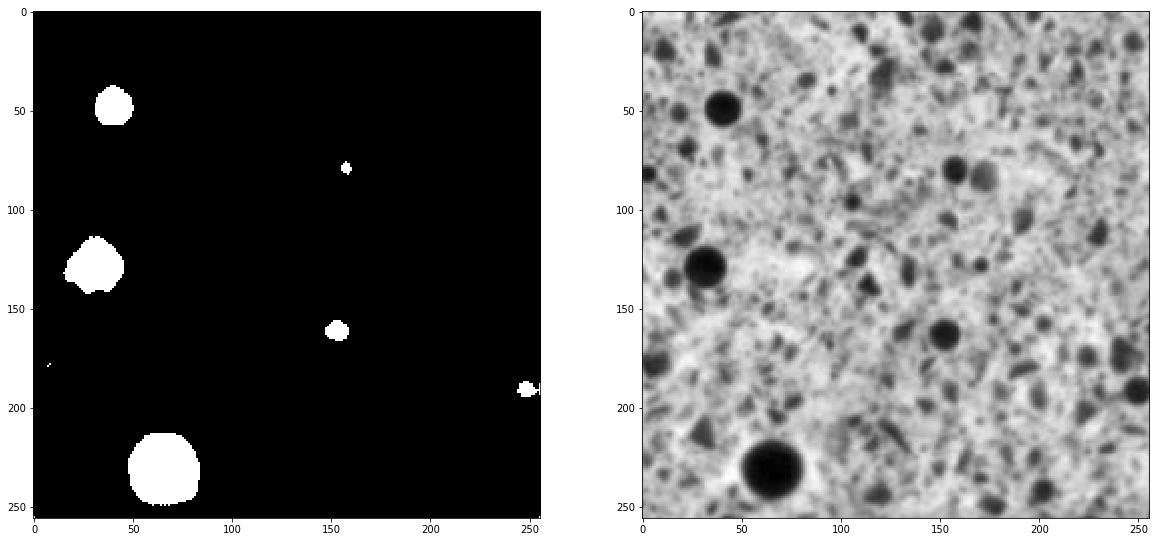

In [12]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(results[230,:,:,0]>0.001, cmap = 'gray')
plt.subplot(122)
plt.imshow(data[230,:,:,0], cmap = 'gray')
